# Python Excercise:  Simple Linear Regression

> ## Table of Contents

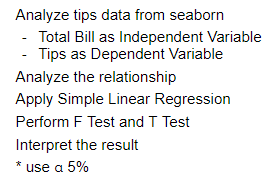


> ## Library

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


> ## Dataset : Tips Dataset

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation 
1. Value : the sake of staff morale

In [ ]:
tips = sns.load_dataset('tips')

> ## EDA

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [ ]:
tips[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


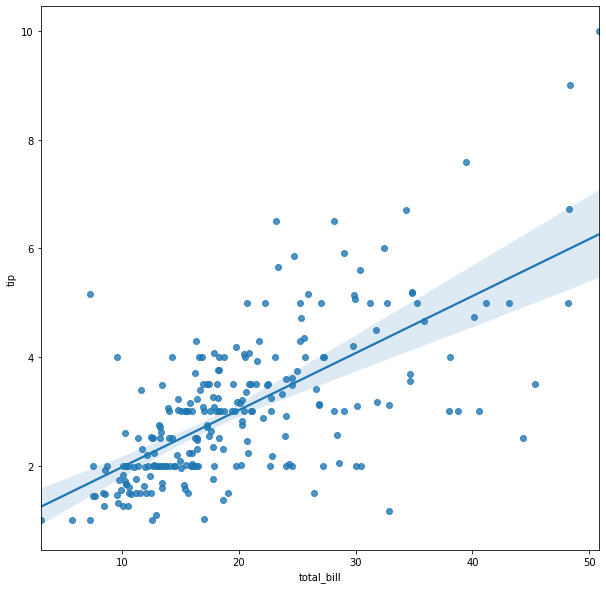

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x = 'total_bill',y = 'tip',data = tips)

> ## Simple Linear Regression

We start to apply simple linear regression to the dataset:
- Y : Tips
- x : Total Bill

In [ ]:
sm_lm = sm.OLS(tips['tip'], sm.add_constant(tips[['total_bill']]))
result = sm_lm.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           6.69e-34
Time:                        07:55:18   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## Interpretation

F-Test:
<br>
B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval
1. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar) 
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square = 45.7% : This model can explain 45.7% variation of tips.

# Python Excercise :  Multiple Linear Regression

> ## Table Of Contents

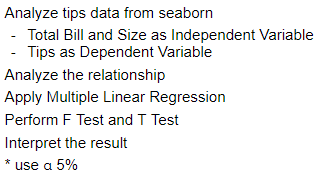

> ## Dataset : Tips Dataset

Framing the problem :
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill and Size 
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation 
1. Value : the sake of staff morale

> ## Library

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

> ## Data Analysis

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [ ]:
tips[['size','total_bill','tip']]

,size,total_bill,tip
0,2,16.99,1.01
1,3,10.34,1.66
2,3,21.01,3.50
3,2,23.68,3.31
4,4,24.59,3.61
...,...,...,...
239,3,29.03,5.92
240,2,27.18,2.00
241,2,22.67,2.00
242,2,17.82,1.75


In [ ]:
tips[['tip','total_bill','size']].describe()

,tip,total_bill,size
count,244.000000,244.000000,244.000000
mean,2.998279,19.785943,2.569672
std,1.383638,8.902412,0.951100
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.900000,17.795000,2.000000
75%,3.562500,24.127500,3.000000
max,10.000000,50.810000,6.000000


In [ ]:
tips[['tip','total_bill','size']].corr()

,tip,total_bill,size
tip,1.000000,0.675734,0.489299
total_bill,0.675734,1.000000,0.598315
size,0.489299,0.598315,1.000000


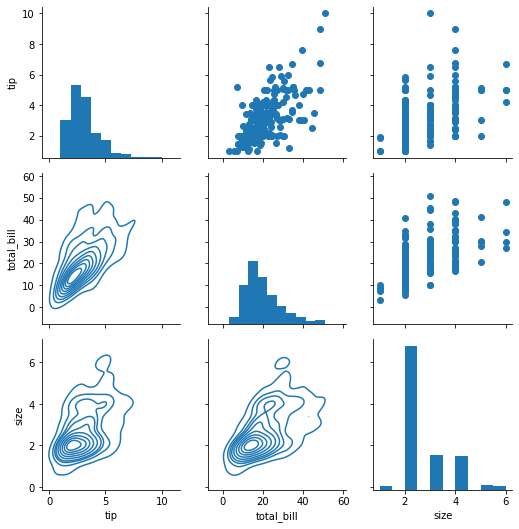

In [ ]:
g = sns.PairGrid(tips[['tip','total_bill','size']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

> ## Multipple Linear Regression

We start to apply multiple linear regression to the dataset:
- Y : Tips
- x : Total Bill and Size

In [ ]:
sm_lm = sm.OLS(tips['tip'], sm.add_constant(tips[['total_bill','size']]))
result = sm_lm.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           9.67e-34
Time:                        07:55:22   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

## Interpretation

F-Test:
<br>
B1, B2 : P-Value of the Simultant test is below 0.05. We have enough evidence that minimum either totall bill or size affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill and size of the party has value of zero. in this case, it doesn't make sense that if there are people who paid food freely and size of the party zero. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that total bill increase tip that given to the food servers
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that size of the party increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.689 : This is not meaningfull to be interpreted
1. B1 = 0.0927 : When the total bill increase 1 Dollar, the tip will increase about 0.0927 Dollar or When the total bill increase 10 Dollar, the tip will increase about 9.27 Dollar (*This interpretation only applied when total bill fall between 3.07 Dollar and 50.81 Dollar)
1. B2 = 0.1926 : When the size of the party increase 1 person, the tip will increase about 0.1926 Dollar(*This interpretation only applied when size of the party fall between 1 and 6) 
1. It is strongly recommended to interprete within the interval of predictor and no changes in another variable

Coefficient Determination:
<br>
R-Square adj = 46.3% : This model can explain 46.3% variation of tips.
<br>
(* by adding size of the party the coefficient determination increase from 45.7% to 46.3%)
